In [1]:
import pandas as pd
data1 = {'age':['<=30','=30','31..40','>40','>40','>40','31..40','<=30','<=30','>40','<=30','31..40','31..40','>40'],
        'income':['high','high','high','medium','low','low','low','medium','low','medium','medium','medium','high','medium'],
        'student':['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
        'credit_rating':['fair','excellent','fair','fair','fair','excellent','excellent','fair','fair','fair','excellent','excellent','fair','excellent'],
        'buys_computer':['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']}
df = pd.DataFrame(data1)
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,=30,high,no,excellent,no
2,31..40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31..40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [2]:
import math
def entropy(class_column):
    entropy = 0
    total_count = len(class_column)
    unique_values = class_column.unique()
    
    for value in unique_values:
        probability = (class_column == value).sum() / total_count
        entropy -= probability * math.log2(probability)
    
    return entropy

target_entropy = entropy(df['buys_computer'])
target_entropy

0.9402859586706311

In [3]:
def information_gain(data, feature, target_feature):
    feature_values = data[feature].unique()
    total_entropy = entropy(data[target_feature])
    
    for value in feature_values:
        subset = data[data[feature] == value]
        subset_entropy = entropy(subset[target_feature])
        total_entropy -= (len(subset) / len(data)) * subset_entropy
    
    return total_entropy

feature_columns = ['age','income','student','credit_rating','buys_computer']
information_gains = {}

for feature in feature_columns:
    information_gains[feature] = information_gain(df, feature, 'buys_computer')

# Step 3: Select the feature with the highest Information Gain as the root node
root_node = max(information_gains, key=information_gains.get)
max_info_gain = information_gains[root_node]

print(f"The root node should be '{root_node}' with Information Gain {max_info_gain:.4f}")

The root node should be 'buys_computer' with Information Gain 0.9403


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
Tr_X = df.drop(columns=['buys_computer'])
Tr_y = df['buys_computer']
model= DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)
tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 4


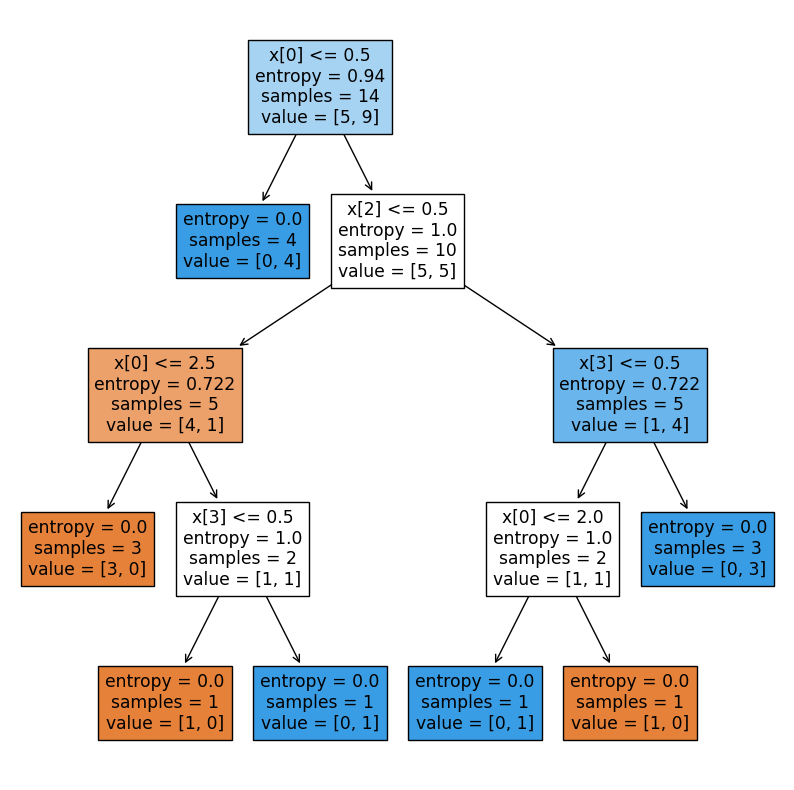

In [6]:
import matplotlib.pyplot as plt
from sklearn import tree
clf = DecisionTreeClassifier(criterion='entropy') 
X = df.drop(columns=['buys_computer'])
y = df['buys_computer']
clf.fit(X, y)
plt.figure(figsize=(10, 10))
tree.plot_tree(clf, filled=True)
plt.show()